
# -------------- Auxiliar 9 --------------

## AS4501-1 

<font size='3'> Profs. Valentino Gonzalez, Francisco Förster

<font size='3'> Author: P. Cáceres Burgos

# ------------------------------------------


In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, LeakyReLU, RandomFlip, RandomRotation
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
import visualkeras

# En esta clase entrenaremos una red neuronal para que clasifique entre tipos de Ropa, a partir de la set de datos fashion_mnist



In [89]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [90]:
os.environ['TENSORBOARD_BINARY'] = '/Users/pola/astroinf_env/bin/tensorboard'

In [91]:
rm -rf ./logs/

## Paso 1. 

Descargamos los datos, que estan separados entre imagenes de entrenamiento y test

In [92]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [93]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [94]:
train_images.shape[0]

60000

In [95]:
test_images.shape[0]

10000

## Visualizemos como se ven nuestros datos!

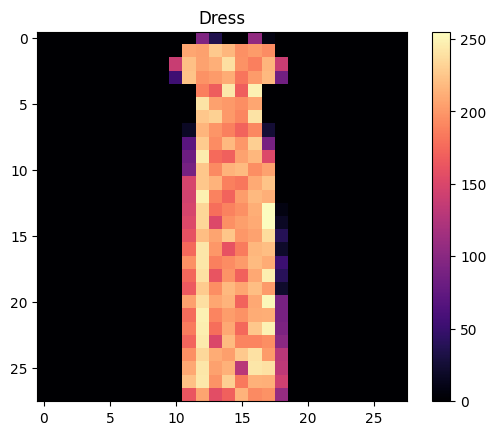

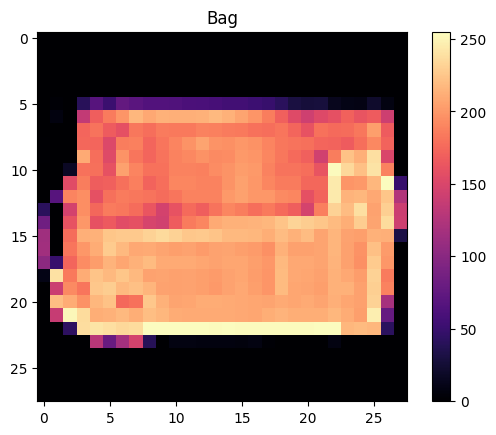

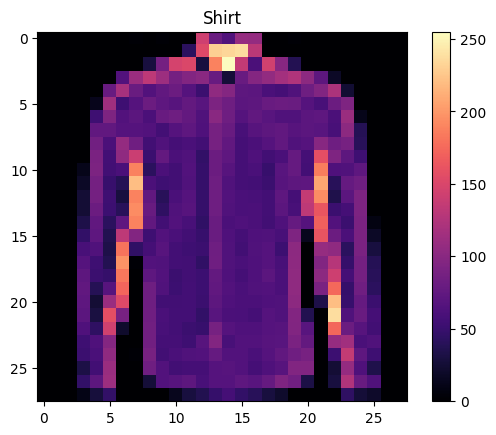

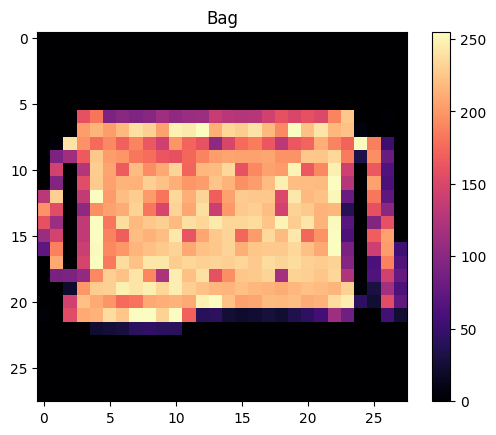

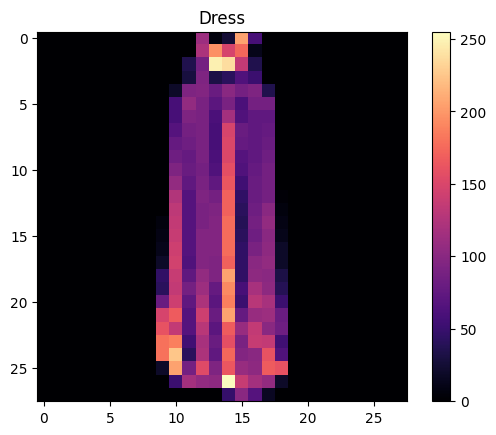

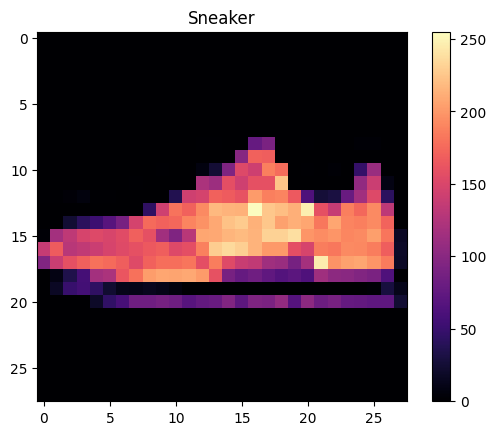

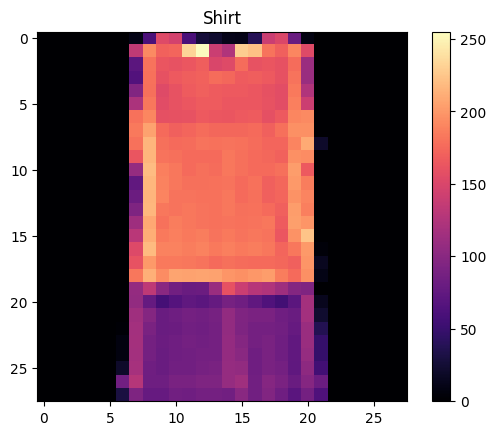

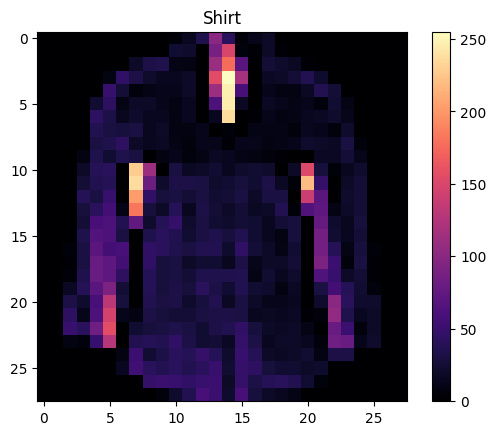

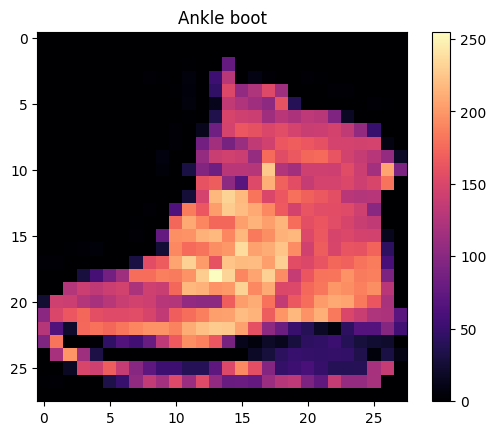

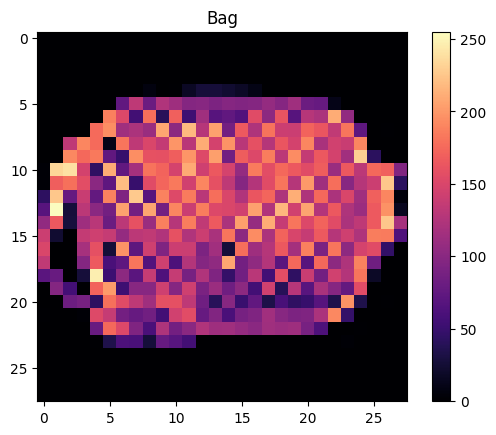

In [62]:
np.random.seed(321)#123
for i in np.random.choice(range(train_images.shape[0]), size=10):

    plt.figure()
    plt.title('{}'.format(class_names[train_labels[i]]))
    plt.imshow(train_images[i], cmap='magma')
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [117]:
def figure_conf_matrix(test_labels, pred_unique_label, class_names=class_names):
    
    
    fig, ax = plt.subplots(figsize=(10, 8))

    cm = confusion_matrix(test_labels, pred_unique_label)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    disp.plot(cmap='magma', xticks_rotation=45, ax = ax)
    
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
    
def plot_feature_maps(activation, layer_name, num_channels=6):
    num_plots = min(num_channels, activation.shape[-1])
    fig, axes = plt.subplots(1, num_plots, figsize=(20, 8))
    for i in range(num_plots):
        axes[i].imshow(activation[0, :, :, i], cmap='viridis')
        axes[i].axis('off')
        
        if i == int(num_plots/2):
            axes[i].set_title(layer_name, fontsize=15)
    plt.show()


# Modelo 1 con redes neuronales convolucionales 

Creamos nuestra red neuronal

In [98]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(10, activation='softmax'))

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                                       restore_best_weights=True)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                               

/Users/pola/astroinf_env/lib/python3.8/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


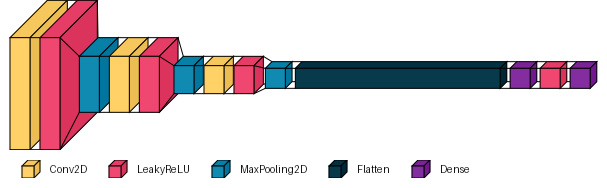

<Figure size 800x800 with 0 Axes>

In [123]:
plt.figure(figsize=(8,8))
visualkeras.layered_view(model, legend=True)

In [99]:
# Compilamos nuestro modelo, definimos el optimizador, el loss y la metrica que queremos evaluar 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
# Corramos el modelo!
history = model.fit(train_images, train_labels, epochs=10, 
                    batch_size=32, validation_split=0.2,
                   callbacks=[tensorboard_callback, early_stop_callback])

Epoch 1/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.5770 - accuracy: 0.8405 - val_loss: 0.3871 - val_accuracy: 0.8604
Epoch 2/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3006 - accuracy: 0.8901 - val_loss: 0.3039 - val_accuracy: 0.8876
Epoch 3/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2683 - accuracy: 0.9005 - val_loss: 0.2892 - val_accuracy: 0.8965
Epoch 4/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2496 - accuracy: 0.9088 - val_loss: 0.2895 - val_accuracy: 0.8930
Epoch 5/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2298 - accuracy: 0.9159 - val_loss: 0.2990 - val_accuracy: 0.8937
Epoch 6/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2189 - accuracy: 0.9196 - val_loss: 0.2730 - val_accuracy: 0.9032
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2027 - accuracy: 0.9253 - val_loss: 0.3106 -

In [101]:
predictions_model1 = model.predict(test_images)
pred_unique_model1 = [np.argmax(k) for k in predictions_model1]
model_model1_score = [np.max(k) for k in predictions_model1]

313/313 [==============================] - 1s 4ms/step


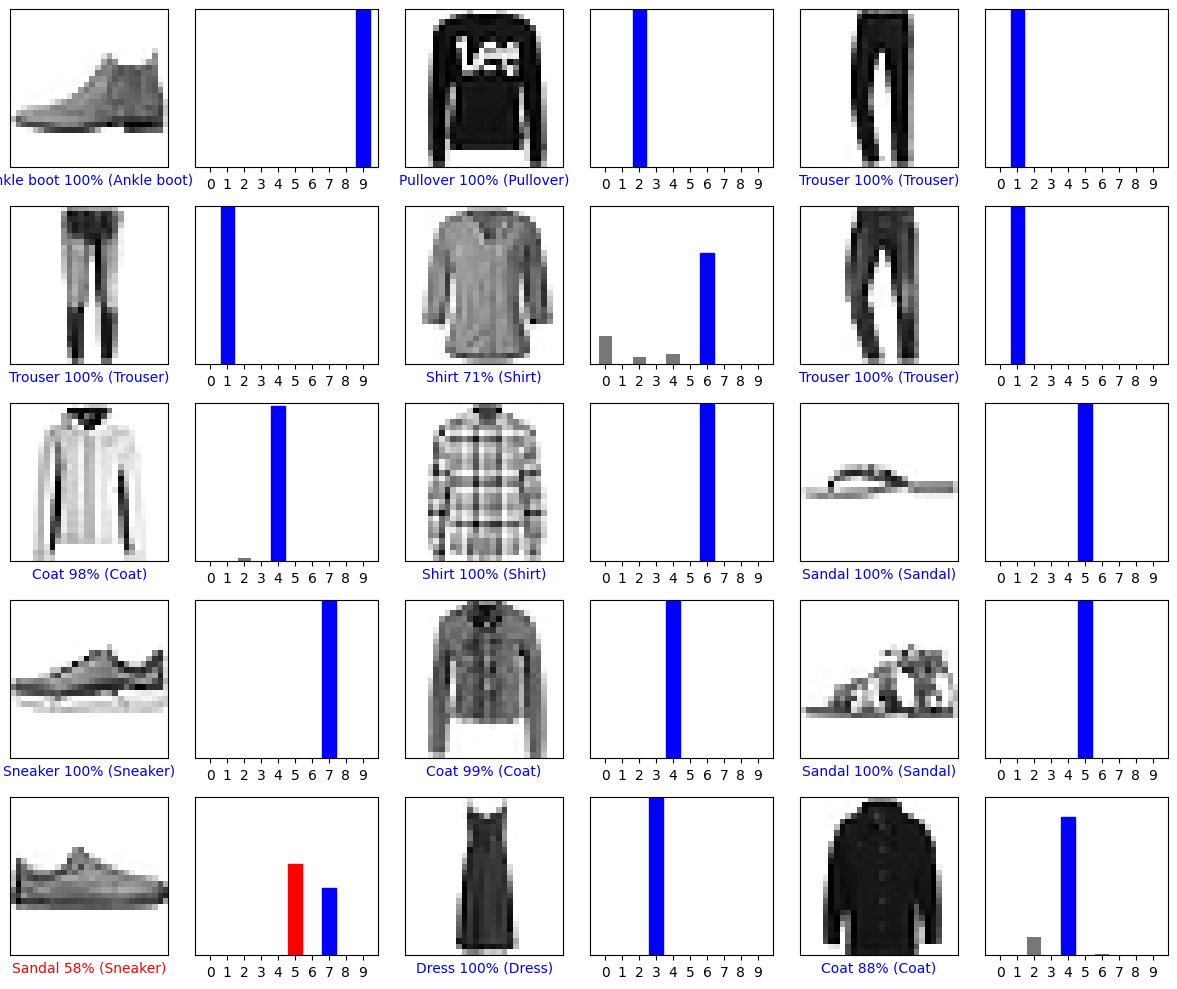

In [102]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_model1[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_model1[i], test_labels)
plt.tight_layout()
plt.show()

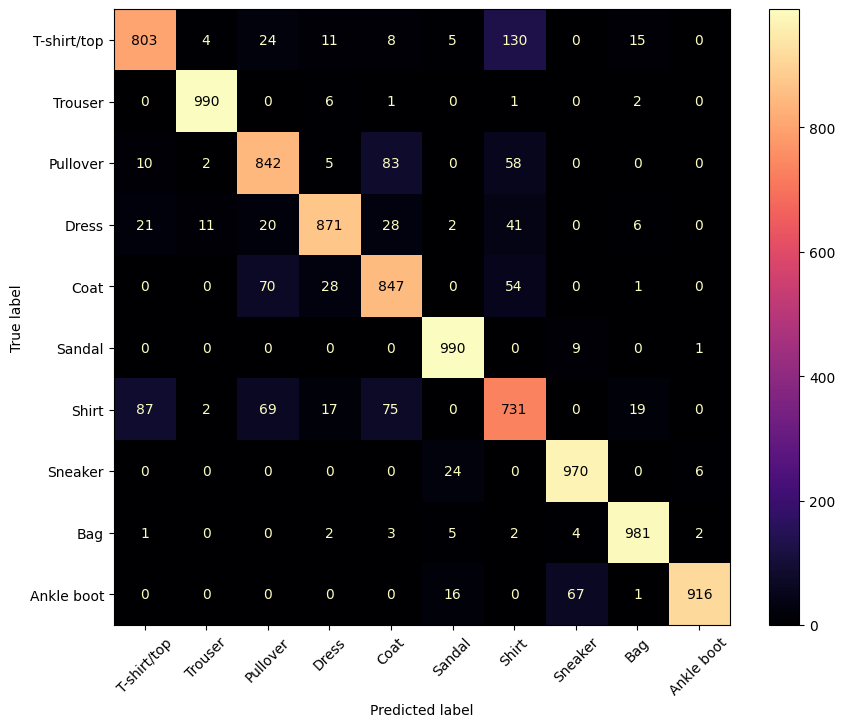

In [103]:
figure_conf_matrix(test_labels, pred_unique_model1)

# ¿ Que es lo que ve una red convolucional?

In [104]:
layer_outputs = [layer.output for layer in model.layers]

activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [105]:
# Elegimos una de imagen de testeo 

sample_image  = test_images[0].reshape(1, 28, 28, 1)

# Corremos como se activa el modelo con este sample image
activations = activation_model.predict(sample_image)


1/1 [==============================] - 0s 68ms/step


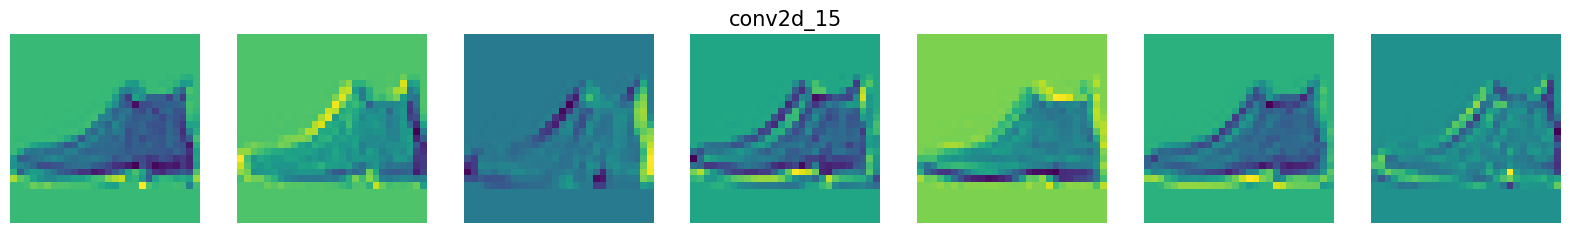

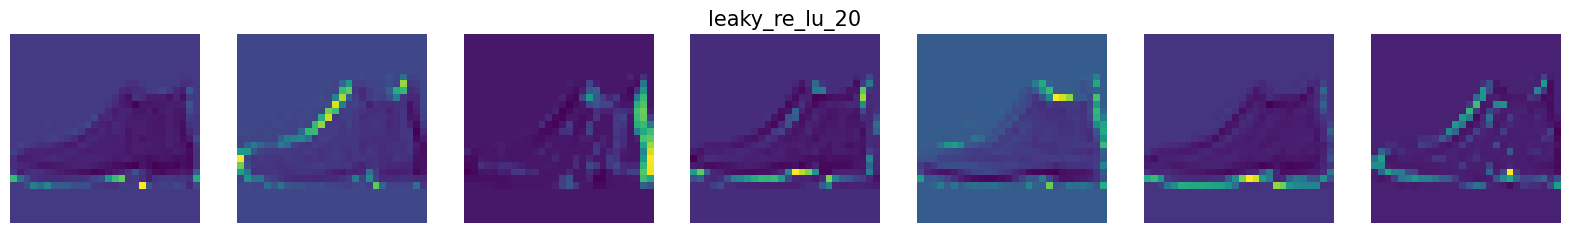

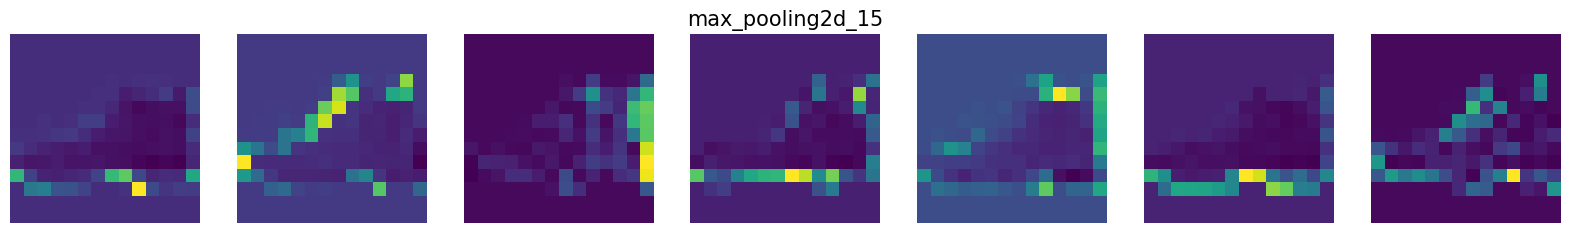

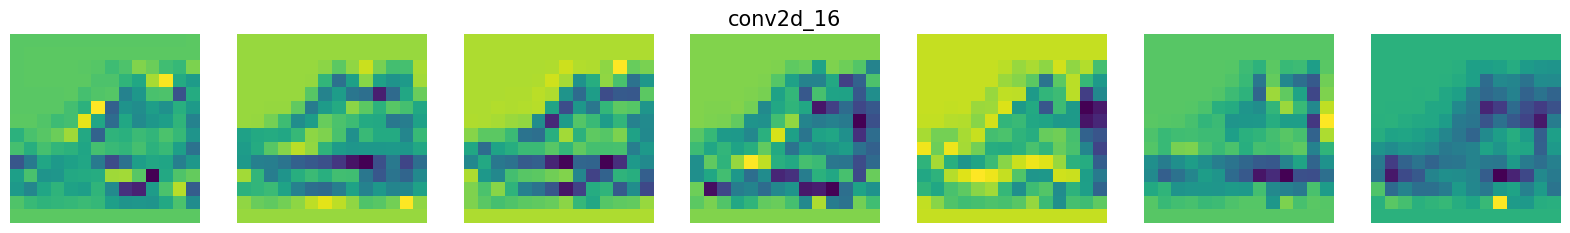

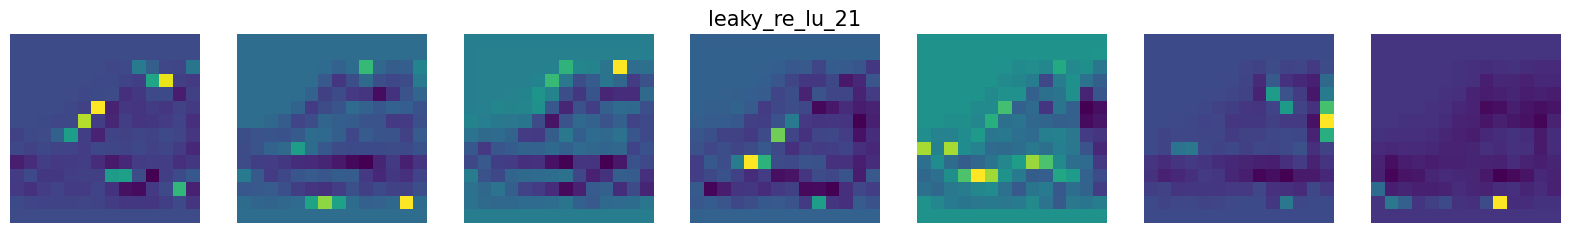

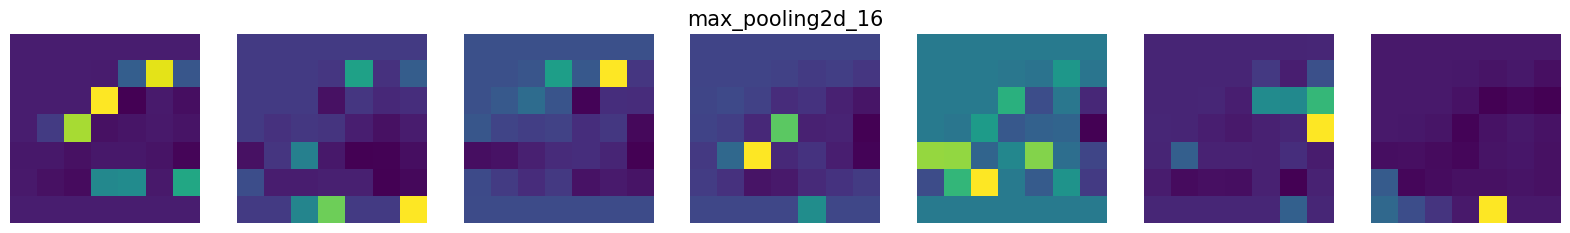

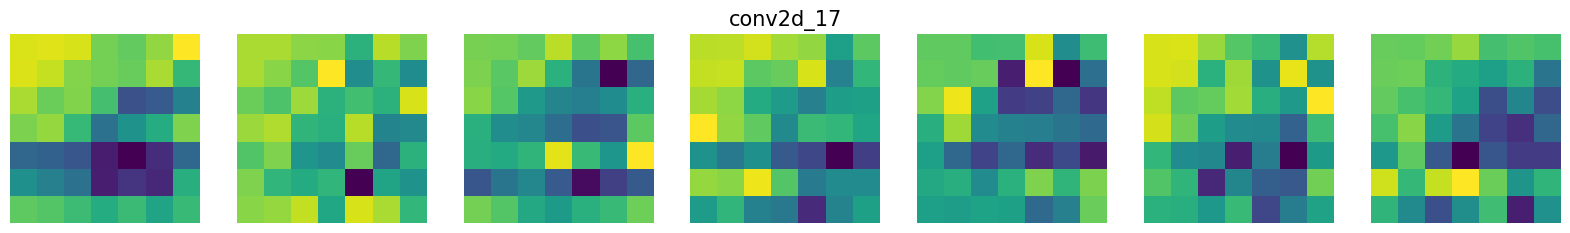

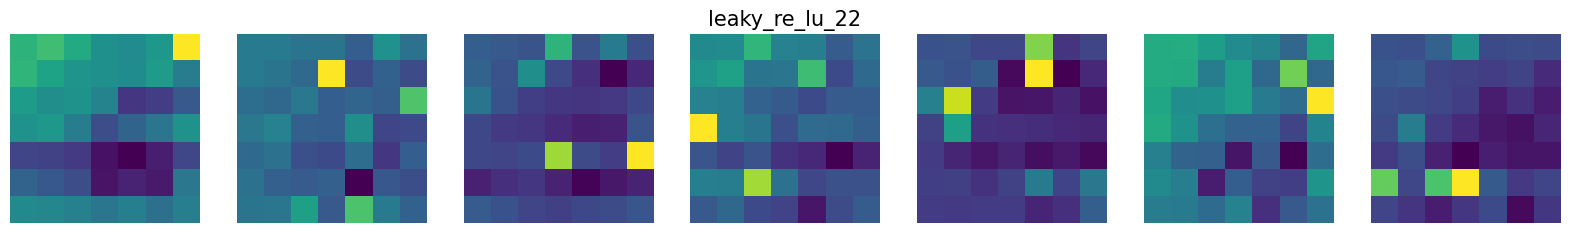

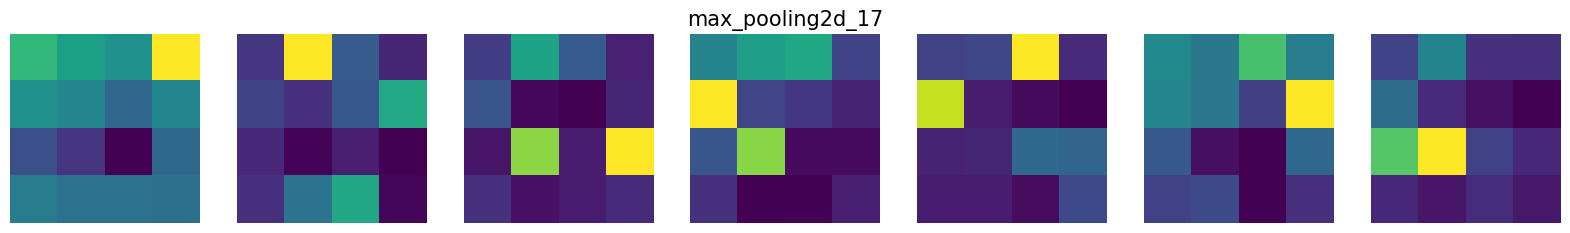

In [120]:
for layer, activation in zip(model.layers, activations):
    
    if len(activation.shape) == 4:
        plot_feature_maps(activation, layer.name, num_channels=7)

1/1 [==============================] - 0s 91ms/step


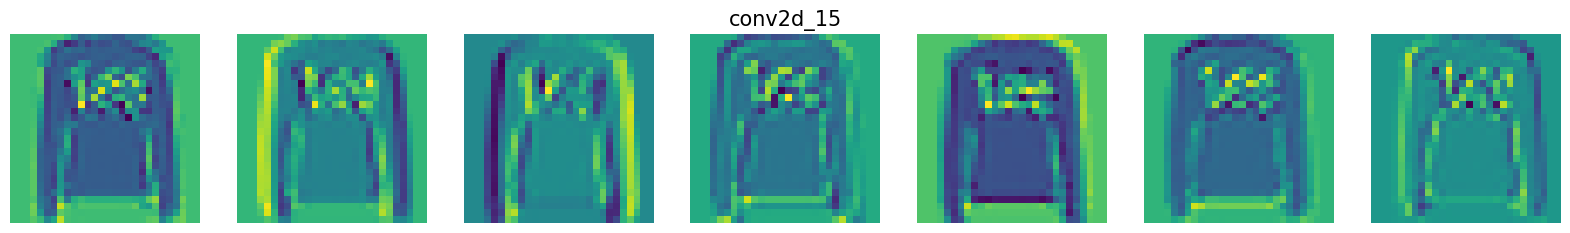

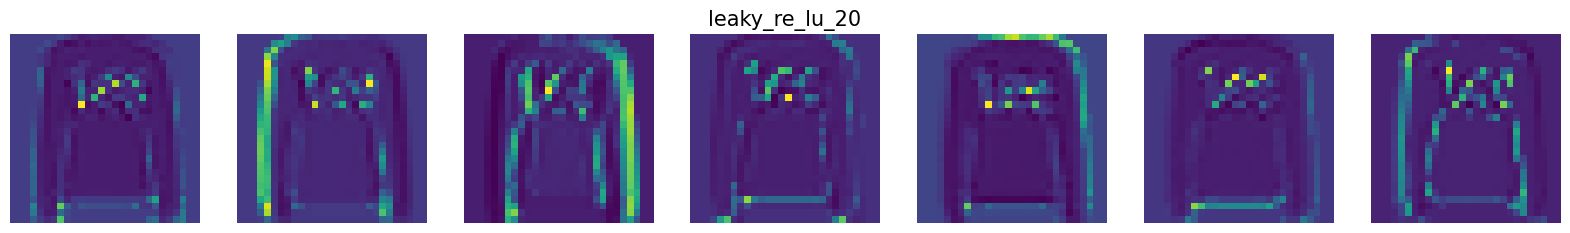

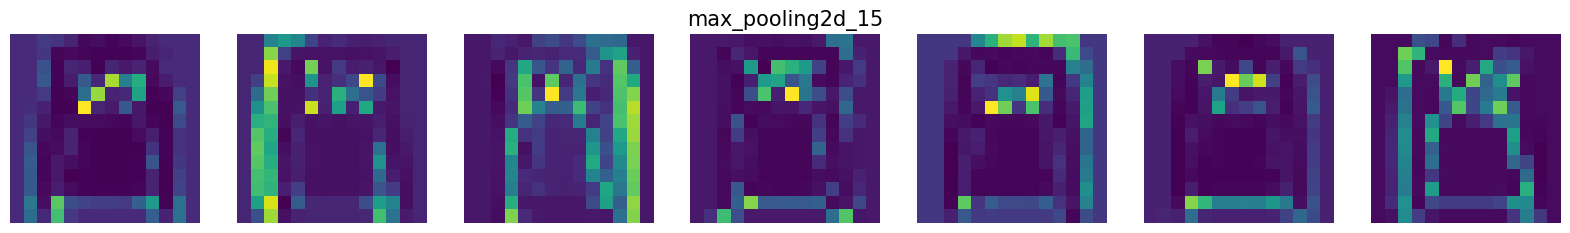

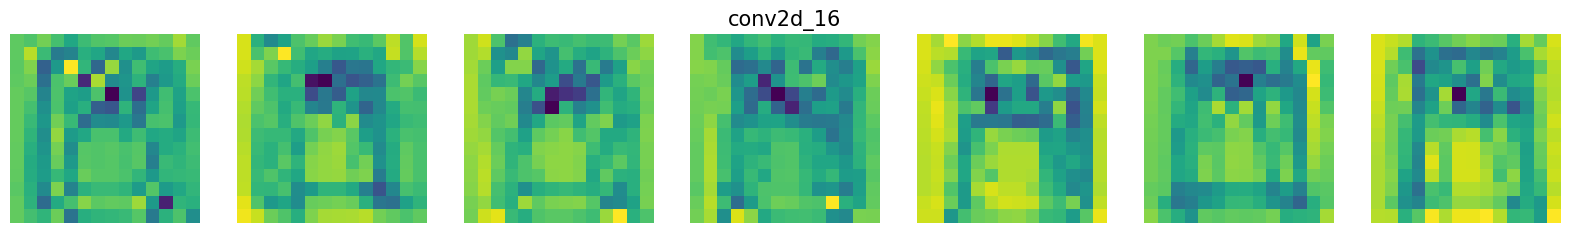

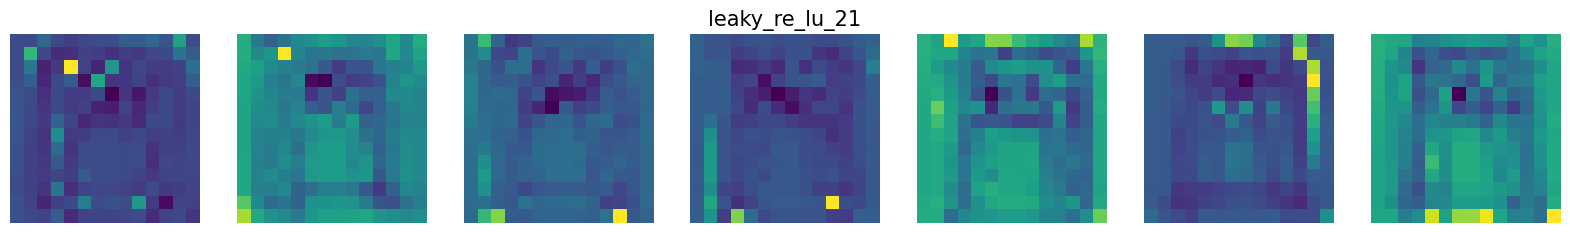

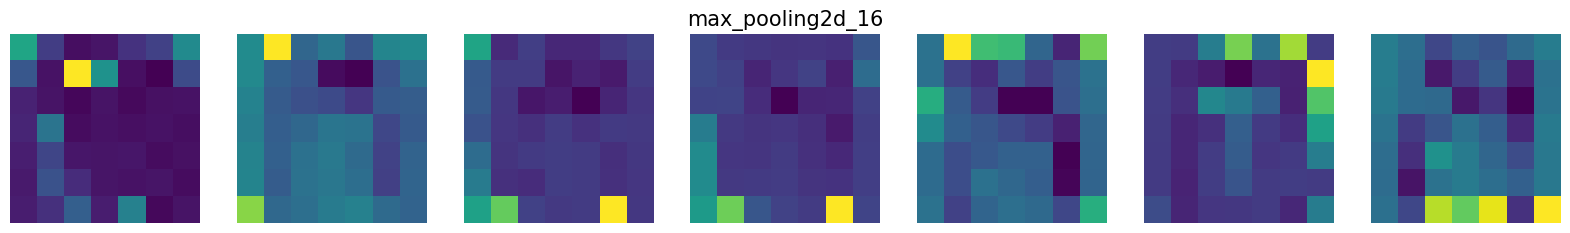

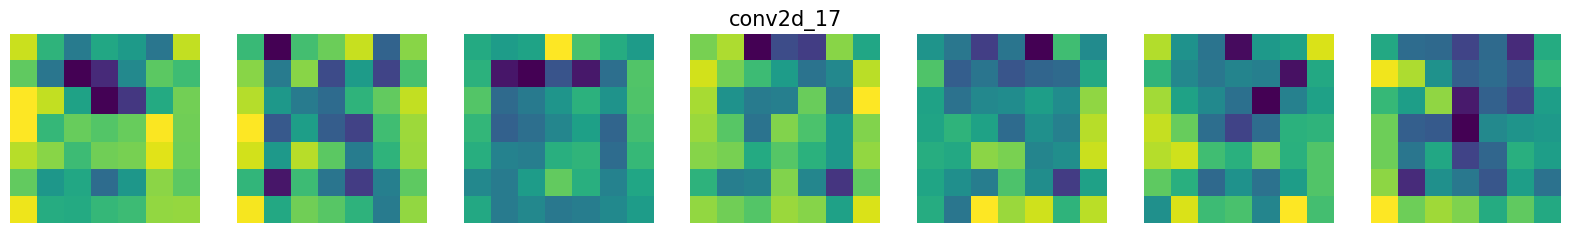

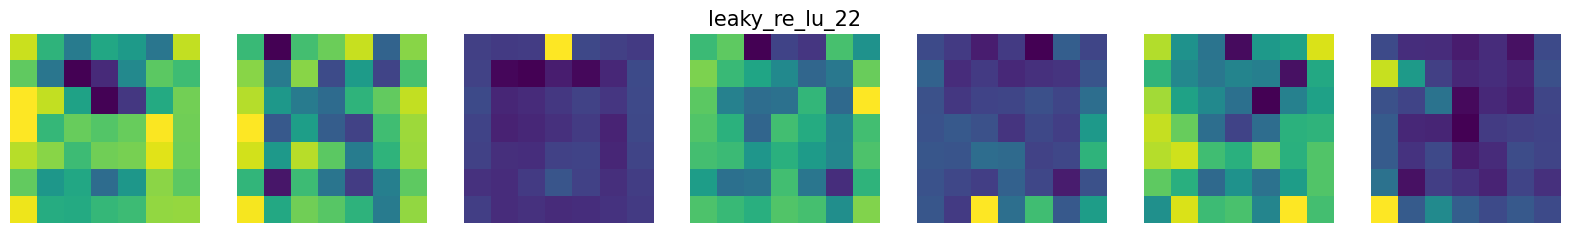

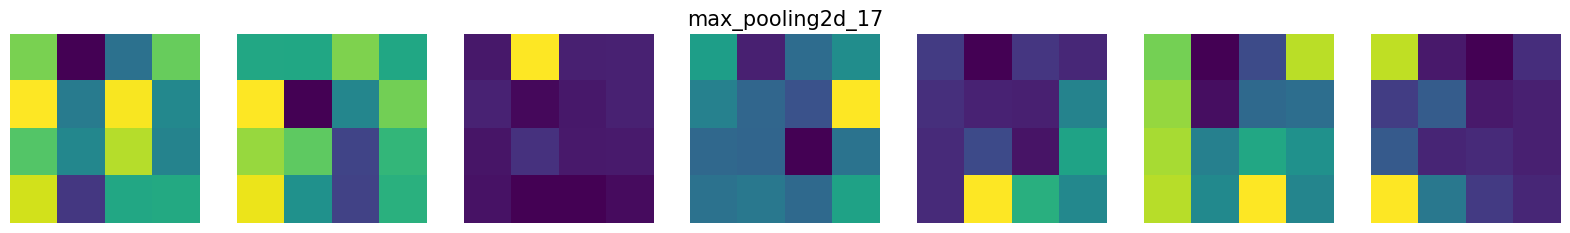

In [122]:

sample_image  = test_images[1].reshape(1, 28, 28, 1)

# Corremos como se activa el modelo con este sample image
activations = activation_model.predict(sample_image)

for layer, activation in zip(model.layers, activations):
    
    if len(activation.shape) == 4:
        plot_feature_maps(activation, layer.name, num_channels=7)

# Ahora probemos con un modelo que incluya Dropouts!

In [124]:
model_wDropout = Sequential()
model_wDropout.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model_wDropout.add(LeakyReLU(alpha=0.1))
model_wDropout.add(MaxPooling2D((2, 2),padding='same'))
model_wDropout.add(Dropout(0.25))
model_wDropout.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_wDropout.add(LeakyReLU(alpha=0.1))
model_wDropout.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_wDropout.add(Dropout(0.25))
model_wDropout.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_wDropout.add(LeakyReLU(alpha=0.1))                  
model_wDropout.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_wDropout.add(Dropout(0.4))
model_wDropout.add(Flatten())
model_wDropout.add(Dense(128, activation='linear'))
model_wDropout.add(LeakyReLU(alpha=0.1))           
model_wDropout.add(Dropout(0.3))
model_wDropout.add(Dense(10, activation='softmax'))

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                                       restore_best_weights=True)



model_wDropout.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                     

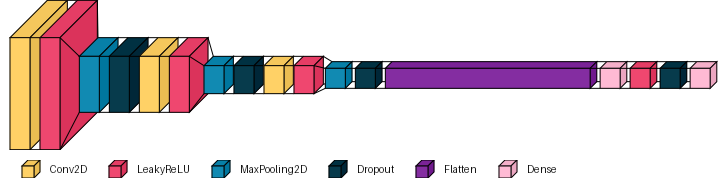

<Figure size 800x800 with 0 Axes>

In [47]:
plt.figure(figsize=(8,8))
visualkeras.layered_view(model_wDropout, legend=True)

In [125]:
model_wDropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [126]:
history = model_wDropout.fit(train_images, train_labels, epochs=10, 
                    batch_size=32, validation_split=0.2,
                   callbacks=[tensorboard_callback, early_stop_callback])

Epoch 1/10
1500/1500 [==============================] - 25s 17ms/step - loss: 1.0448 - accuracy: 0.7250 - val_loss: 0.4092 - val_accuracy: 0.8472
Epoch 2/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.4675 - accuracy: 0.8307 - val_loss: 0.3347 - val_accuracy: 0.8782
Epoch 3/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.4102 - accuracy: 0.8522 - val_loss: 0.3045 - val_accuracy: 0.8887
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3903 - accuracy: 0.8568 - val_loss: 0.2983 - val_accuracy: 0.8913
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3820 - accuracy: 0.8611 - val_loss: 0.3051 - val_accuracy: 0.8879
Epoch 6/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3665 - accuracy: 0.8677 - val_loss: 0.2898 - val_accuracy: 0.8928
Epoch 7/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3611 - accuracy: 0.8674 - val_loss: 0.2931 -

In [127]:
predictions_model_wDropout = model_wDropout.predict(test_images)
pred_unique_model_wDropout = [np.argmax(k) for k in predictions_model_wDropout]
model_wDropout_score = [np.max(k) for k in predictions_model_wDropout]

313/313 [==============================] - 2s 5ms/step


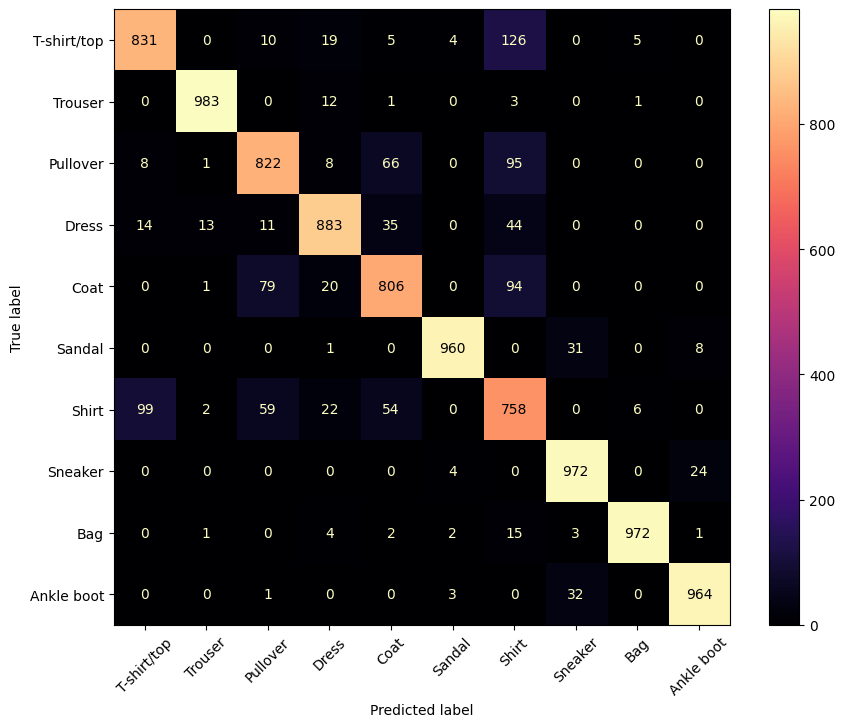

In [179]:
figure_conf_matrix(test_labels, pred_unique_model_wDropout)

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

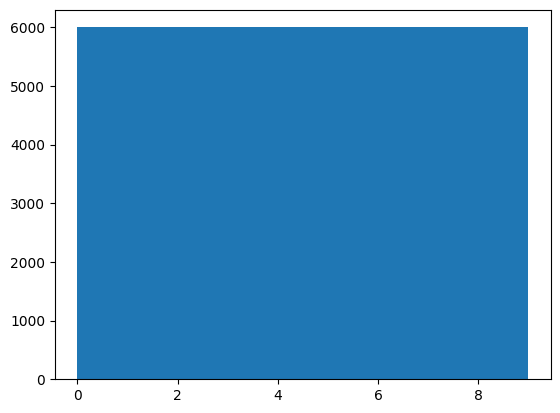

In [180]:
plt.hist(train_labels)

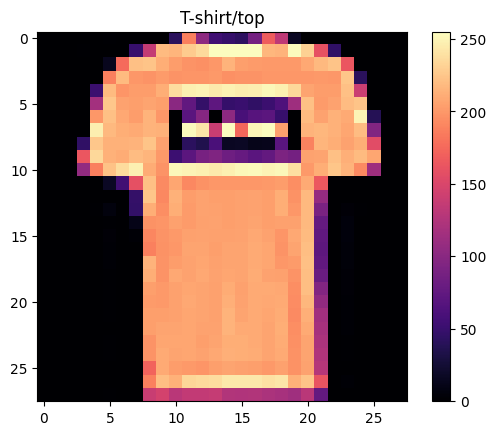

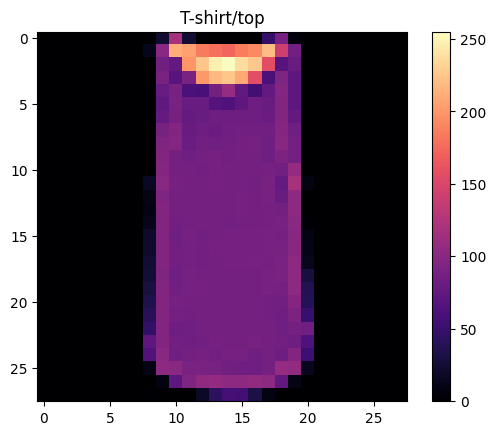

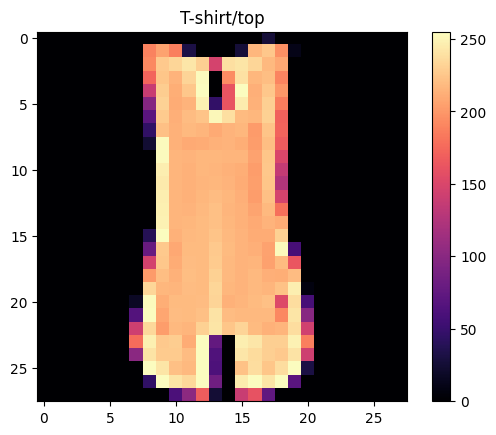

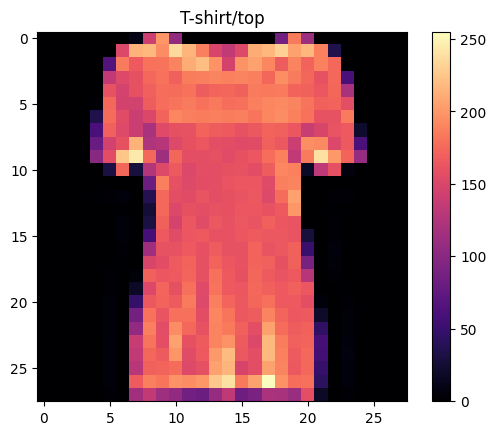

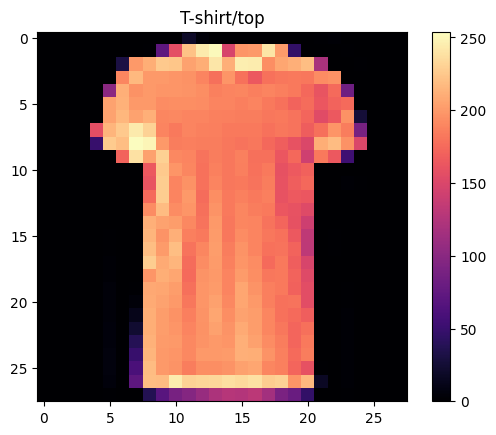

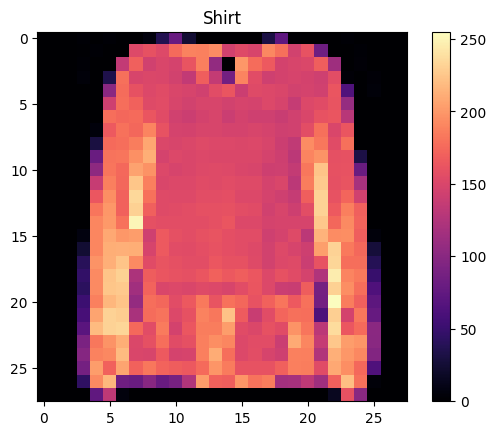

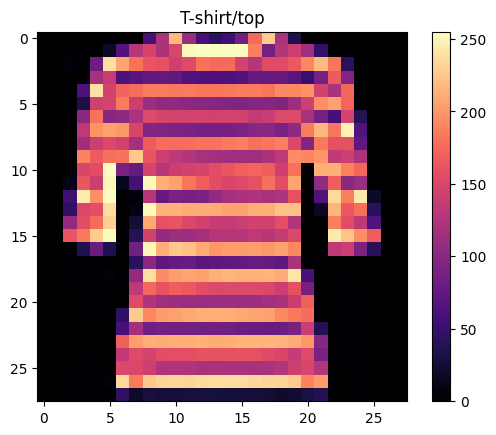

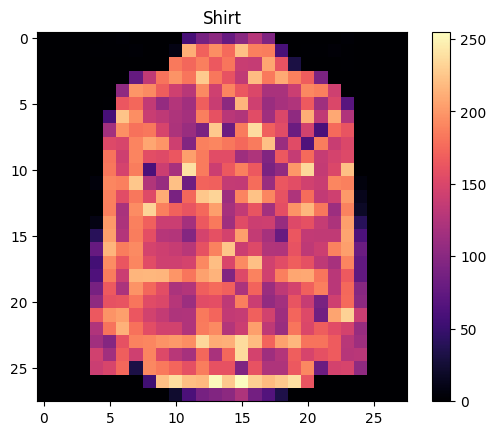

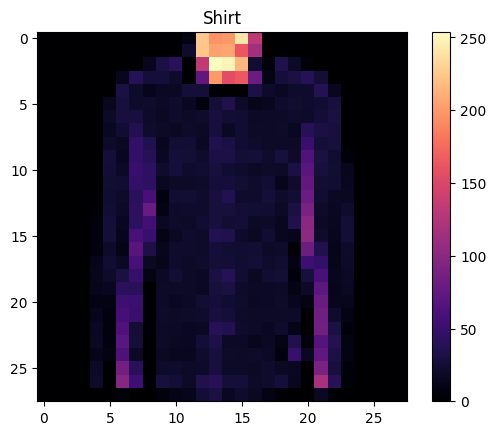

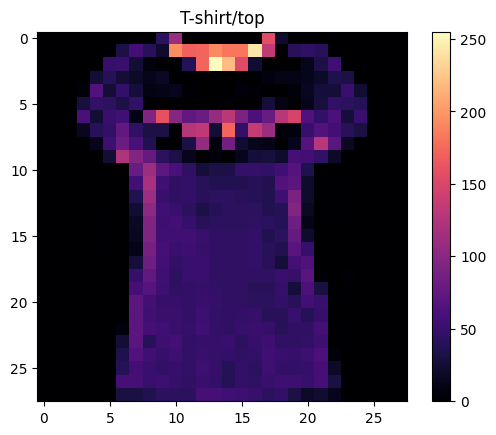

In [157]:
ids, = np.where((train_labels==6) | (train_labels==0))


for i in ids[:10]:
    plt.figure()
    plt.title('{}'.format(class_names[train_labels[i]]))
    plt.imshow(train_images[i], cmap='magma')
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [191]:
#target_classes = (train_labels==6) | (train_labels==0)
x_aug = train_images.reshape(60000, 28, 28, 1)
y_aug = train_labels#[target_classes]


In [190]:
np.shape(x_aug)

(60000, 28, 28)

In [192]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05
)

In [193]:
num_augmented = len(x_aug)

augmented_images = []
augmented_labels = []

for x_batch, y_batch in datagen.flow(x_aug, y_aug, batch_size=32, shuffle=True):
    augmented_images.append(x_batch)
    augmented_labels.append(y_batch)
    num_augmented -= len(x_batch)
    if num_augmented <= 0:
        break

x_augmented = np.concatenate(augmented_images)[:len(x_aug)]
y_augmented = np.concatenate(augmented_labels)[:len(x_aug)]


In [168]:
len(x_augmented)

12000

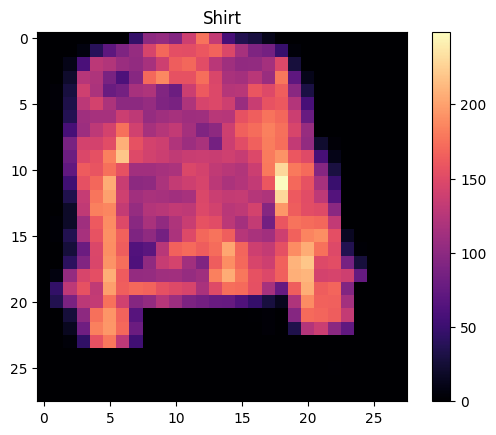

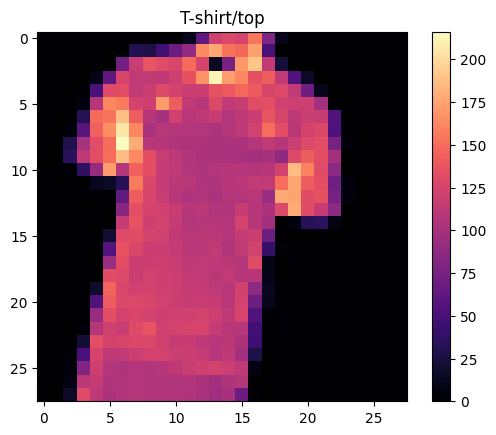

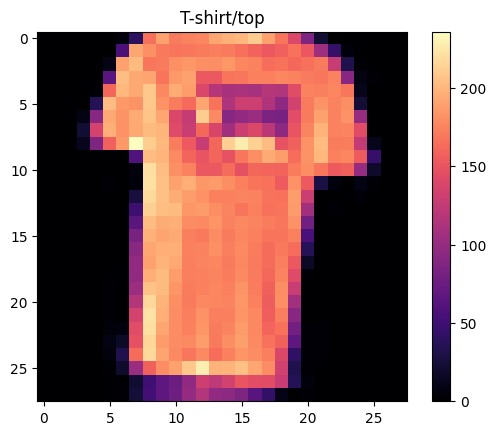

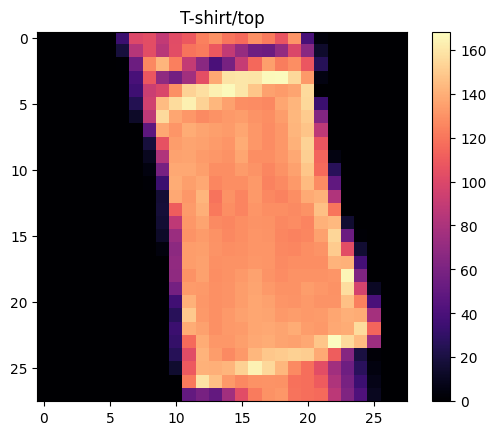

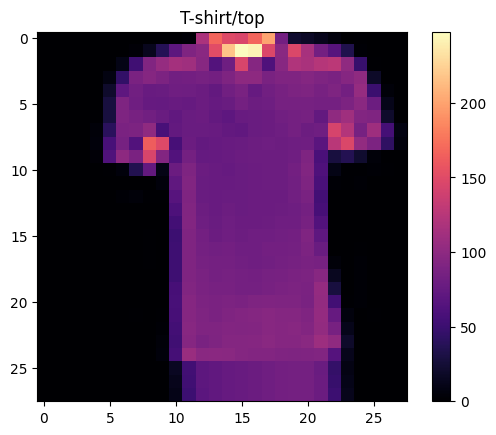

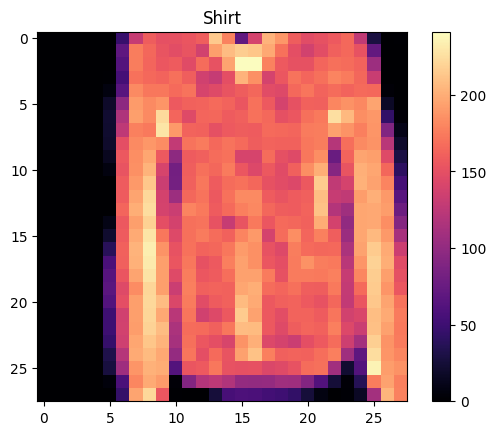

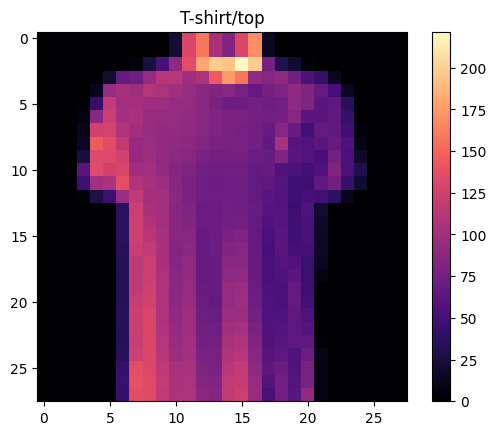

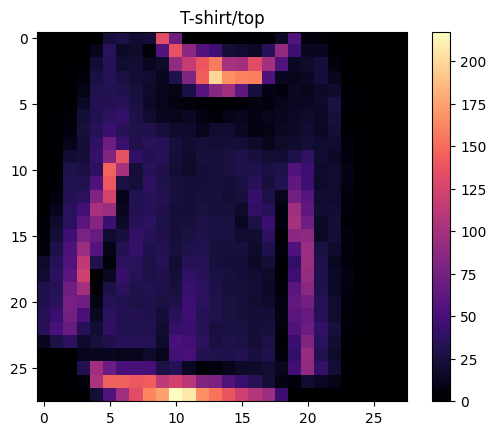

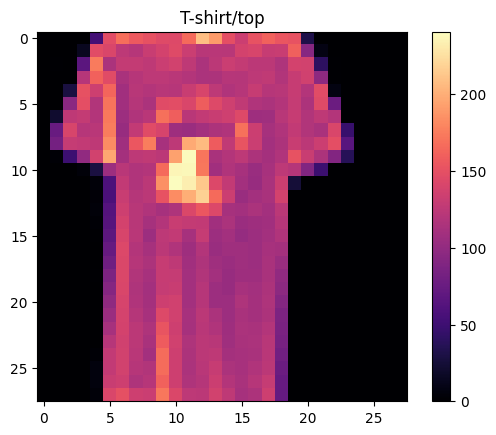

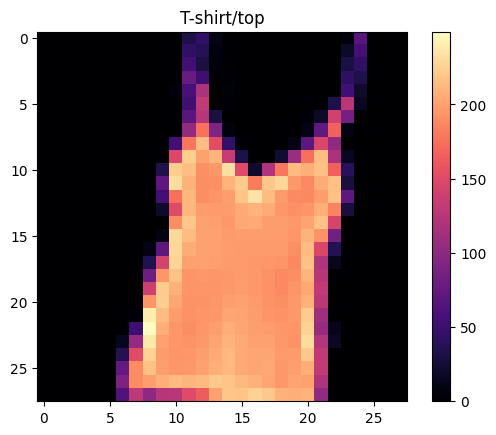

In [164]:
for i in range(10):
    plt.figure()
    plt.title('{}'.format(class_names[y_augmented[i]]))
    plt.imshow(x_augmented[i], cmap='magma')
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [194]:
x_train_new = np.concatenate([train_images, x_augmented.reshape(60000, 28, 28) ])
y_train_new = np.concatenate([train_labels, y_augmented])


(array([12000., 12000., 12000., 12000., 12000., 12000., 12000., 12000.,
        12000., 12000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

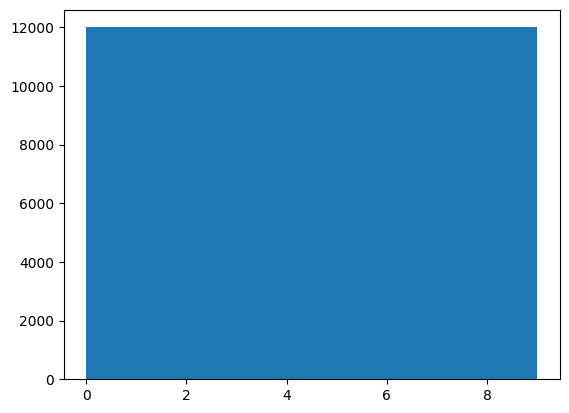

In [195]:
plt.hist(y_train_new)

In [196]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(10, activation='softmax'))

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                                       restore_best_weights=True)



model_wDropout.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                     

In [197]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [198]:
history = model.fit(x_train_new, y_train_new, epochs=10, 
                    batch_size=32, validation_split=0.2,
                   callbacks=[tensorboard_callback, early_stop_callback])

Epoch 1/10
3000/3000 [==============================] - 36s 12ms/step - loss: 0.4414 - accuracy: 0.8542 - val_loss: 0.3480 - val_accuracy: 0.8716
Epoch 2/10
3000/3000 [==============================] - 36s 12ms/step - loss: 0.2939 - accuracy: 0.8914 - val_loss: 0.3976 - val_accuracy: 0.8544
Epoch 3/10
3000/3000 [==============================] - 37s 12ms/step - loss: 0.2646 - accuracy: 0.9017 - val_loss: 0.3504 - val_accuracy: 0.8752
Epoch 4/10
3000/3000 [==============================] - 38s 13ms/step - loss: 0.2452 - accuracy: 0.9087 - val_loss: 0.3211 - val_accuracy: 0.8746
Epoch 5/10
3000/3000 [==============================] - 38s 13ms/step - loss: 0.2287 - accuracy: 0.9143 - val_loss: 0.2782 - val_accuracy: 0.8975
Epoch 6/10
3000/3000 [==============================] - 38s 13ms/step - loss: 0.2174 - accuracy: 0.9182 - val_loss: 0.3164 - val_accuracy: 0.8827
Epoch 7/10
3000/3000 [==============================] - 38s 13ms/step - loss: 0.2058 - accuracy: 0.9237 - val_loss: 0.2983 -

In [203]:
predictions_model_wDA = model.predict(test_images)
pred_unique_model_wDA = [np.argmax(k) for k in predictions_model_wDA]
model_wDA_score = [np.max(k) for k in predictions_model_wDA]

313/313 [==============================] - 2s 5ms/step


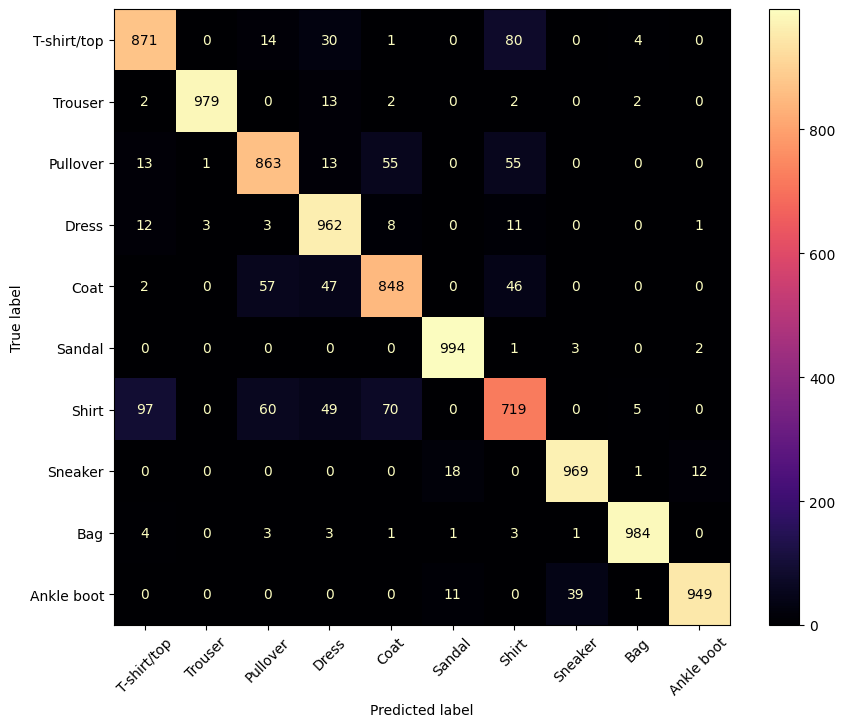

In [202]:
figure_conf_matrix(test_labels, pred_unique_model_wDA)


# Y si usamos un modelo aun mas simple? (el mismo del aux 8)

In [17]:
model_simple = Sequential()

model_simple.add(Flatten(input_shape=(28,28))) # Aplanamos los datos para que entren como 1 dimension
model_simple.add(Dense(128, activation='relu')) # Capa con 128 neuronas
model_simple.add(Dense(10, activation='softmax')) # Capa exterior con 10 neuronas porque clasificamos 10 clases de ropa

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                                       restore_best_weights=True)


model_simple.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


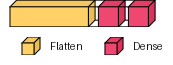

<Figure size 800x800 with 0 Axes>

In [48]:
plt.figure(figsize=(8,8))
visualkeras.layered_view(model_simple, legend=True)

In [18]:
model_simple.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model_simple.fit(train_images, train_labels, epochs=10, 
                    batch_size=32, validation_split=0.2,
                   callbacks=[tensorboard_callback, early_stop_callback])

Epoch 1/10
1500/1500 [==============================] - 2s 892us/step - loss: 3.8933 - accuracy: 0.6891 - val_loss: 0.8147 - val_accuracy: 0.7103
Epoch 2/10
1500/1500 [==============================] - 1s 768us/step - loss: 0.7142 - accuracy: 0.7367 - val_loss: 0.6325 - val_accuracy: 0.7898
Epoch 3/10
1500/1500 [==============================] - 1s 798us/step - loss: 0.6068 - accuracy: 0.7885 - val_loss: 0.5626 - val_accuracy: 0.8023
Epoch 4/10
1500/1500 [==============================] - 1s 787us/step - loss: 0.5638 - accuracy: 0.8023 - val_loss: 0.5401 - val_accuracy: 0.8115
Epoch 5/10
1500/1500 [==============================] - 1s 837us/step - loss: 0.5366 - accuracy: 0.8132 - val_loss: 0.6199 - val_accuracy: 0.7808
Epoch 6/10
1500/1500 [==============================] - 1s 758us/step - loss: 0.5261 - accuracy: 0.8196 - val_loss: 0.5626 - val_accuracy: 0.8164
Epoch 7/10
1500/1500 [==============================] - 1s 758us/step - loss: 0.5186 - accuracy: 0.8216 - val_loss: 0.5770 -

In [22]:
predictions_model_simple = model_simple.predict(test_images)
pred_unique_model_simple = [np.argmax(k) for k in predictions_model_simple]
model_simple_score = [np.max(k) for k in predictions_model_simple]

313/313 [==============================] - 0s 450us/step


## Tensorboard!

In [207]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 26021), started 0:21:42 ago. (Use '!kill 26021' to kill it.)

In [204]:
y_true_bin = (test_labels == pred_unique_model_simple).astype(float)
fpr_model_simple, tpr_model_simple, thresholds_model_simple = roc_curve(y_true_bin, model_simple_score)

y_true_bin = (test_labels == pred_unique_model1).astype(float)
fpr_model1, tpr_model1, thresholds_model1 = roc_curve(y_true_bin, model_model1_score)

y_true_bin = (test_labels == pred_unique_model_wDropout).astype(float)
fpr_model_wDropout, tpr_model_wDropout, thresholds_model_wDropout = roc_curve(y_true_bin, model_wDropout_score)

y_true_bin = (test_labels == pred_unique_model_wDA).astype(float)
fpr_model_wDA, tpr_model_wDA, thresholds_model_wDA= roc_curve(y_true_bin, model_wDA_score)


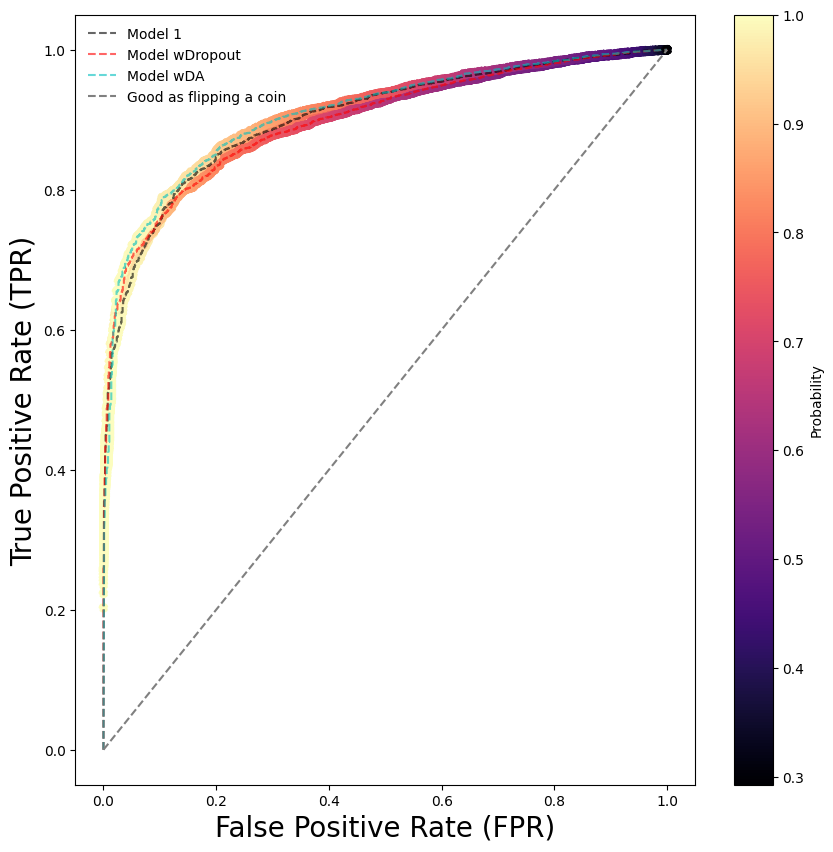

In [206]:
plt.figure(figsize=(10,10))

#plt.scatter(fpr_model_simple, tpr_model_simple, c = thresholds_model_simple, cmap='magma', ls='--')
#plt.plot(fpr_model_simple, tpr_model_simple, color='blue', ls='--', alpha=0.6, label='Simple model')

plt.scatter(fpr_model1, tpr_model1, c = thresholds_model1, cmap='magma', ls='--')
plt.plot(fpr_model1, tpr_model1, color='k', ls='--', alpha=0.6, label='Model 1')

plt.scatter(fpr_model_wDropout, tpr_model_wDropout, c = thresholds_model_wDropout, cmap='magma', ls='--')
plt.plot(fpr_model_wDropout, tpr_model_wDropout, color='r', ls='--', alpha=0.6, label='Model wDropout')

plt.scatter(fpr_model_wDA, tpr_model_wDA, c = thresholds_model_wDA, cmap='magma', ls='--')
plt.plot(fpr_model_wDA, tpr_model_wDA, color='c', ls='--', alpha=0.6, label='Model wDA')


plt.colorbar(label='Probability')
plt.plot([0,1], [0,1], ls='--', color='gray', label='Good as flipping a coin')
plt.ylabel('True Positive Rate (TPR)', fontsize=20)
plt.xlabel('False Positive Rate (FPR)', fontsize=20)
plt.legend(frameon=False)


In [ ]:
# Simple model

    